In [23]:
#Geo plot current speed and current CF
import numpy as np
import pandas as pd
import geoplot as gplt
import geopandas as gpd
import datetime as dt
import csv
import matplotlib.colors as clrs
import matplotlib.pyplot as plt


In [24]:
#Get coastline data
CoastLine=[]

File_CoastLine=open('../GEO_data/Coastline_NC.csv', "r")
File_CoastLine_csv=csv.reader(File_CoastLine,delimiter=',')

for EachLine in File_CoastLine_csv:

    if File_CoastLine_csv.line_num > 1:
        CoastLine.append([float(EachLine[1]), float(EachLine[0])] ) #LatLong


CoastLine=np.array(CoastLine)

ShapeFileCoast="../GEO_data/ne_10m_coastline.shp"
ShapeFileStates="../GEO_data/ne_10m_admin_1_states_provinces_lines.shp"


#Distance between two lat long points
def DistanceToShore (CoastLine, LatLong1): #Compute distance to shore in km of a lat long point
   
    CoastLine=CoastLine*2*np.pi/360
    LatLong1=LatLong1*2*np.pi/360
    
    LatLong1=np.reshape(LatLong1,(1,2))
    dLat=LatLong1[:,0]-CoastLine[:,0]
    dLong=LatLong1[:,1]-CoastLine[:,1]
    
    a=np.power(np.sin(dLat/2),2)+np.cos(CoastLine[:,0])*np.cos(LatLong1[:,0])*np.power(np.sin(dLong/2),2)
    c=2*np.arcsin(np.minimum(1,np.sqrt(a)))
    d=6367*c
    
    Distance=np.min(d) #Minimum distance to shore km
    
    return Distance


def CurveDistanceFromShore(CoastLine, TargetDistance):
    LatLongForDistance=[]

    for Lat in np.arange(33,36.2,0.005): 
        MinD=1000
        StoreLong=0
        
        for Long in np.arange(-74,-79,-0.005):
            D=DistanceToShore(CoastLine, np.array([Lat, Long]))      
            
            if abs(D-TargetDistance)<MinD:
                MinD=abs(D-TargetDistance)
                StoreLong=Long
                
            if abs(D-TargetDistance)<0.6 or D<0.6:
                break
            
        LatLongForDistance.append([Lat, StoreLong])

    return np.array(LatLongForDistance)

In [25]:
HourlyData=np.load('HycomMabsab.npz', allow_pickle=True)
OceanDateTime_MABSAB=HourlyData['OceanDateTime_MABSAB']
CurrentSpeed_MABSAB=HourlyData['CurrentSpeed_MABSAB']
LatLong_MABSAB=HourlyData['LatLong_MABSAB']
DepthSites_MABSAB=HourlyData['DepthSites_MABSAB']
ShoreDistance_MABSAB=HourlyData['ShoreDistance']
DateTime_HYCOM=HourlyData['DateTime_HYCOM']
DailyAverage_Hycom=HourlyData['DailyAverage_Hycom']
CurrentSpeedByDay_HYCOM=HourlyData['CurrentSpeedByDay_HYCOM']
LatLong_HYCOM=HourlyData['LatLong_HYCOM']

In [26]:
LatLong66km=CurveDistanceFromShore(CoastLine,  66)
LatLong100km=CurveDistanceFromShore(CoastLine, 100)
LatLong150km=CurveDistanceFromShore(CoastLine, 150)
min_longitude=-77
max_longitude=-74

min_latitude=33
max_latitude=36

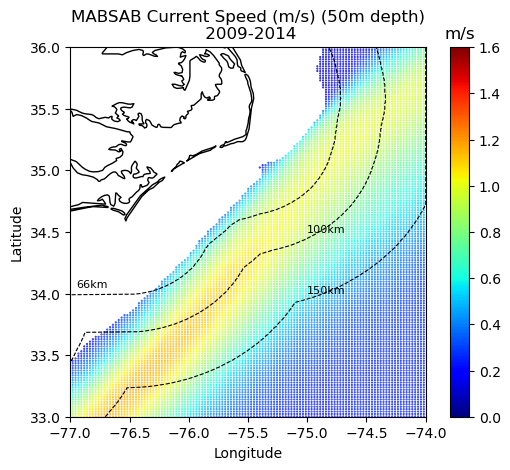

In [27]:

xlim =[min_longitude,max_longitude]
ylim=[min_latitude, max_latitude]

df = gpd.read_file(ShapeFileCoast)
df1 = gpd.read_file(ShapeFileStates)

fig, ax = plt.subplots(figsize  = None)

df.plot(color='black',linewidth=1,ax=ax)
df1.plot(color='black',linewidth=1,ax=ax)


plt.plot(LatLong66km[:,1],LatLong66km[:,0], linestyle='--', color='black', linewidth=0.8)
plt.plot(LatLong100km[:,1],LatLong100km[:,0], linestyle='--', color='black', linewidth=0.8)
plt.plot(LatLong150km[:,1],LatLong150km[:,0], linestyle='--', color='black', linewidth=0.8)

plt.scatter(LatLong_MABSAB[:,1],LatLong_MABSAB[:,0],c=np.average(CurrentSpeed_MABSAB,axis=1), s=0.2, cmap='jet', vmin=0, vmax=1.6)

clb = plt.colorbar()
clb.ax.set_title('m/s')

plt.text(-76.95,34.05,"66km",fontsize=8)

plt.text(-75,34.5,"100km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

plt.text(-75,34,"150km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

plt.title("MABSAB Current Speed (m/s) (50m depth)\n 2009-2014")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.savefig('MABSABCurrentSpeed2009_2014.png', dpi=600, bbox_inches='tight')

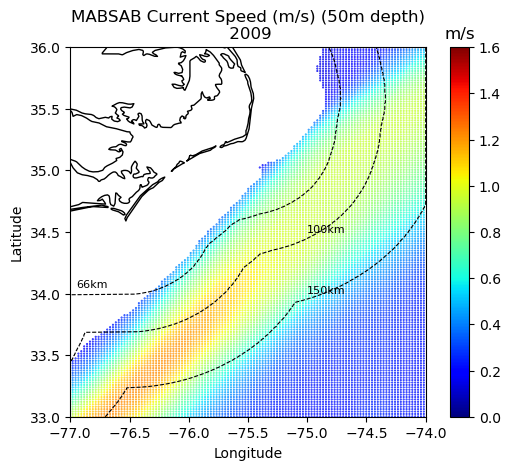

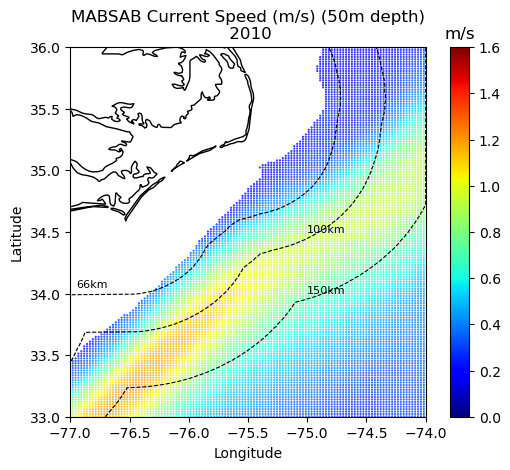

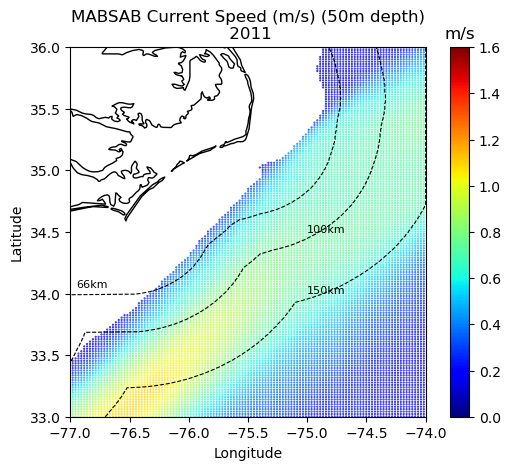

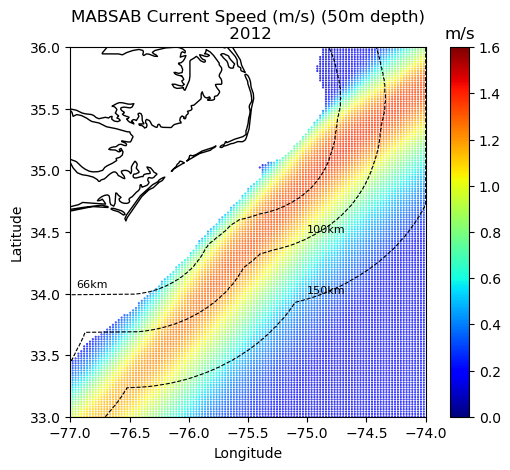

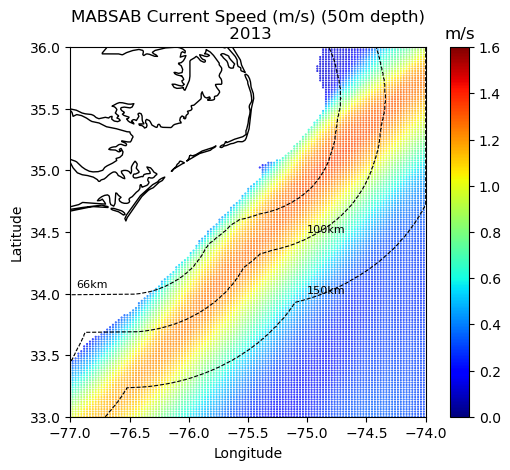

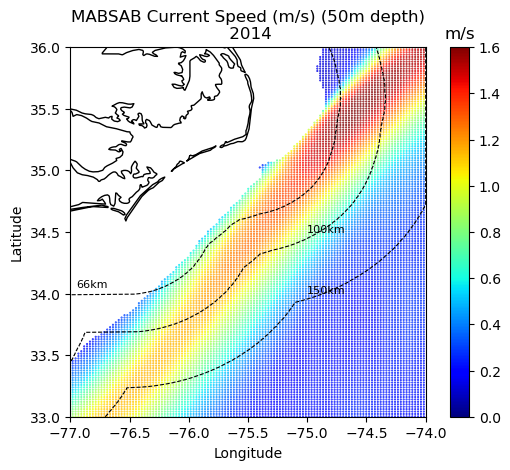

In [28]:

for Year in [2009,2010,2011,2012,2013,2014]:

    xlim =[min_longitude,max_longitude]
    ylim=[min_latitude, max_latitude]

    df = gpd.read_file(ShapeFileCoast)
    df1 = gpd.read_file(ShapeFileStates)

    fig, ax = plt.subplots(figsize  = None)

    df.plot(color='black',linewidth=1,ax=ax)
    df1.plot(color='black',linewidth=1,ax=ax)


    plt.plot(LatLong66km[:,1],LatLong66km[:,0], linestyle='--', color='black', linewidth=0.8)
    plt.plot(LatLong100km[:,1],LatLong100km[:,0], linestyle='--', color='black', linewidth=0.8)
    plt.plot(LatLong150km[:,1],LatLong150km[:,0], linestyle='--', color='black', linewidth=0.8)

    Years=np.array([OceanDateTime_MABSAB[i].year for i in range(len(OceanDateTime_MABSAB))])
    y=np.average(CurrentSpeed_MABSAB[:,Years==Year],axis=1)
    plt.scatter(LatLong_MABSAB[:,1],LatLong_MABSAB[:,0],c=y, s=0.2, cmap='jet', vmin=0, vmax=1.6)

    clb = plt.colorbar()
    clb.ax.set_title('m/s')

    plt.text(-76.95,34.05,"66km",fontsize=8)

    plt.text(-75,34.5,"100km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

    plt.text(-75,34,"150km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

    plt.title("MABSAB Current Speed (m/s) (50m depth)\n "+str(Year))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.savefig('MABSABCurrentSpeed_'+str(Year)+'.png', dpi=600, bbox_inches='tight')

# MABSAB HYCOM Resolution

In [29]:
#Convert to Hycom Resolution
MABSAB_HYCOM_LatLong=np.ones(DailyAverage_Hycom.shape,dtype=float)*-10
a=[]
KeepMABSAB_H=[]
for i in range(LatLong_HYCOM.shape[0]):
    HycomLat=LatLong_HYCOM[i,0]
    HycomLong=LatLong_HYCOM[i,1]
    
    d=np.sqrt((HycomLat-LatLong_MABSAB[:,0])**2+(HycomLong-LatLong_MABSAB[:,1])**2)
    a.append(d.min())
    IdxInMabsab=d<0.085
    if np.sum(IdxInMabsab)>0:
        KeepMABSAB_H.append(True)
        MABSAB_HYCOM_LatLong[i,:]=np.mean(CurrentSpeed_MABSAB[IdxInMabsab,:],axis=0,keepdims=False)
    else:
        KeepMABSAB_H.append(False)

KeepMABSAB_H=np.array(KeepMABSAB_H)

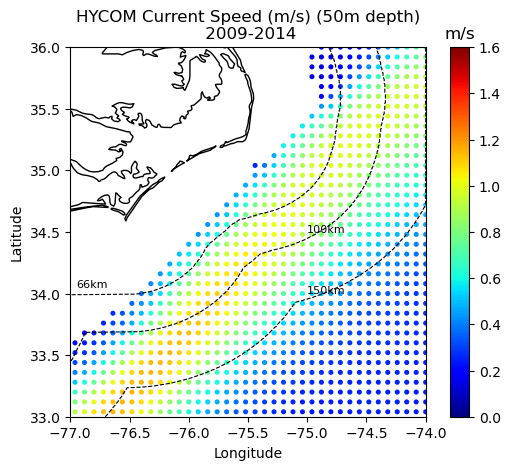

In [30]:
xlim =[min_longitude,max_longitude]
ylim=[min_latitude, max_latitude]

df = gpd.read_file(ShapeFileCoast)
df1 = gpd.read_file(ShapeFileStates)

fig, ax = plt.subplots(figsize  = None)

df.plot(color='black',linewidth=1,ax=ax)
df1.plot(color='black',linewidth=1,ax=ax)


plt.plot(LatLong66km[:,1],LatLong66km[:,0], linestyle='--', color='black', linewidth=0.8)
plt.plot(LatLong100km[:,1],LatLong100km[:,0], linestyle='--', color='black', linewidth=0.8)
plt.plot(LatLong150km[:,1],LatLong150km[:,0], linestyle='--', color='black', linewidth=0.8)

plt.scatter(LatLong_HYCOM[KeepMABSAB_H,1],LatLong_HYCOM[KeepMABSAB_H,0],c=np.average(MABSAB_HYCOM_LatLong[KeepMABSAB_H,:],axis=1), s=7, cmap='jet', vmin=0, vmax=1.6)

clb = plt.colorbar()
clb.ax.set_title('m/s')

plt.text(-76.95,34.05,"66km",fontsize=8)

plt.text(-75,34.5,"100km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

plt.text(-75,34,"150km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

plt.title("HYCOM Current Speed (m/s) (50m depth)\n 2009-2014")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.savefig('MABSAB_HCurrentSpeed2009_2014.png', dpi=600, bbox_inches='tight')

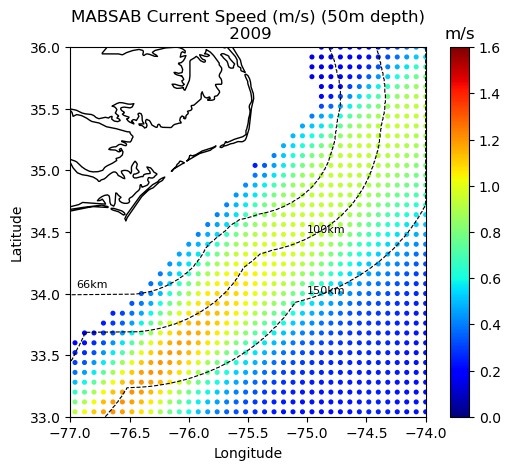

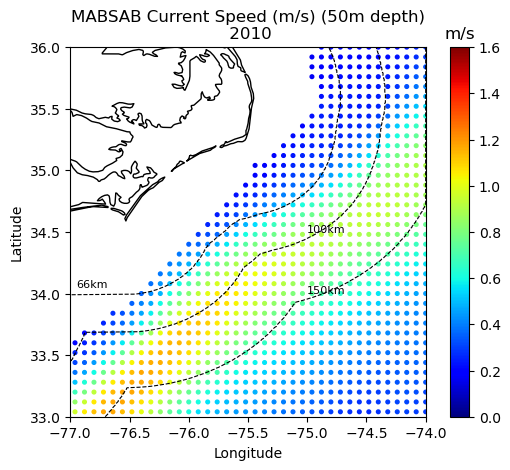

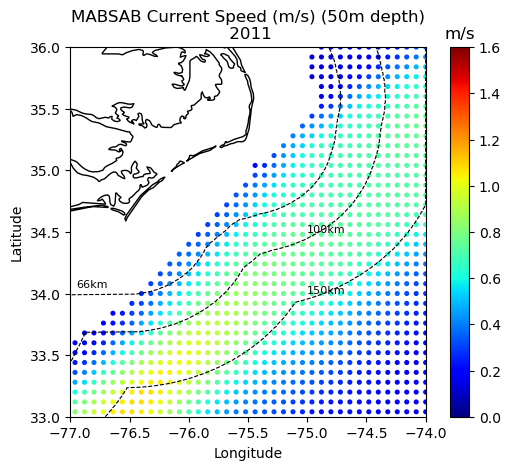

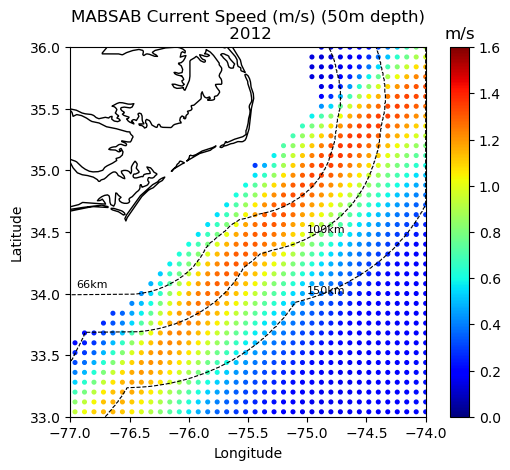

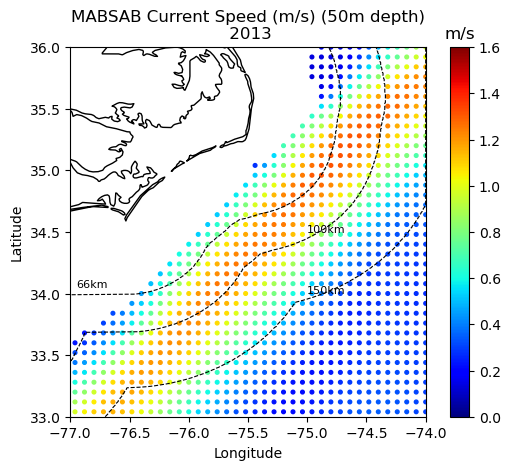

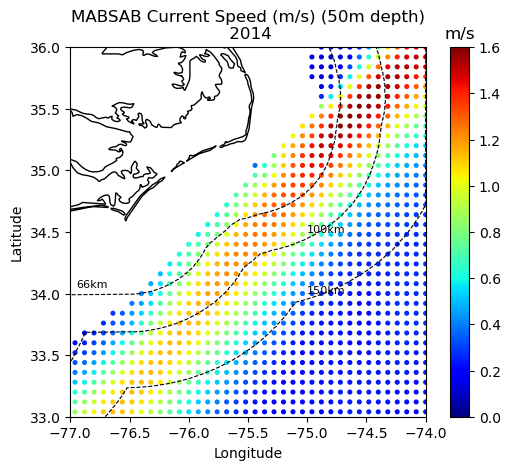

In [34]:

for Year in [2009,2010,2011,2012,2013,2014]:

    xlim =[min_longitude,max_longitude]
    ylim=[min_latitude, max_latitude]

    df = gpd.read_file(ShapeFileCoast)
    df1 = gpd.read_file(ShapeFileStates)

    fig, ax = plt.subplots(figsize  = None)

    df.plot(color='black',linewidth=1,ax=ax)
    df1.plot(color='black',linewidth=1,ax=ax)


    plt.plot(LatLong66km[:,1],LatLong66km[:,0], linestyle='--', color='black', linewidth=0.8)
    plt.plot(LatLong100km[:,1],LatLong100km[:,0], linestyle='--', color='black', linewidth=0.8)
    plt.plot(LatLong150km[:,1],LatLong150km[:,0], linestyle='--', color='black', linewidth=0.8)

    Years=np.array([OceanDateTime_MABSAB[i].year for i in range(len(OceanDateTime_MABSAB))])
    y=np.average(MABSAB_HYCOM_LatLong[KeepMABSAB_H,:][:,Years==Year],axis=1)
    
    plt.scatter(LatLong_HYCOM[KeepMABSAB_H,1],LatLong_HYCOM[KeepMABSAB_H,0],c=y, s=7, cmap='jet', vmin=0, vmax=1.6)

    clb = plt.colorbar()
    clb.ax.set_title('m/s')

    plt.text(-76.95,34.05,"66km",fontsize=8)

    plt.text(-75,34.5,"100km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

    plt.text(-75,34,"150km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

    plt.title("MABSAB Current Speed (m/s) (50m depth)\n "+str(Year))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.savefig('MABSAB_HCurrentSpeed_'+str(Year)+'.png', dpi=600, bbox_inches='tight')

# HYCOM

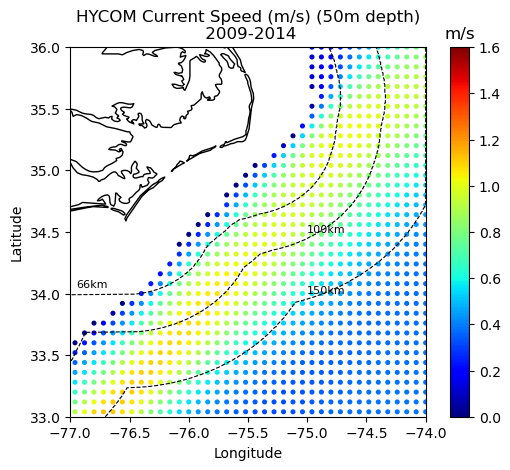

In [32]:
xlim =[min_longitude,max_longitude]
ylim=[min_latitude, max_latitude]

df = gpd.read_file(ShapeFileCoast)
df1 = gpd.read_file(ShapeFileStates)

fig, ax = plt.subplots(figsize  = None)

df.plot(color='black',linewidth=1,ax=ax)
df1.plot(color='black',linewidth=1,ax=ax)


plt.plot(LatLong66km[:,1],LatLong66km[:,0], linestyle='--', color='black', linewidth=0.8)
plt.plot(LatLong100km[:,1],LatLong100km[:,0], linestyle='--', color='black', linewidth=0.8)
plt.plot(LatLong150km[:,1],LatLong150km[:,0], linestyle='--', color='black', linewidth=0.8)

plt.scatter(LatLong_HYCOM[:,1],LatLong_HYCOM[:,0],c=np.average(DailyAverage_Hycom,axis=1), s=7, cmap='jet', vmin=0, vmax=1.6)

clb = plt.colorbar()
clb.ax.set_title('m/s')

plt.text(-76.95,34.05,"66km",fontsize=8)

plt.text(-75,34.5,"100km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

plt.text(-75,34,"150km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

plt.title("HYCOM Current Speed (m/s) (50m depth)\n 2009-2014")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.savefig('HYCOMCurrentSpeed2009_2014.png', dpi=600, bbox_inches='tight')

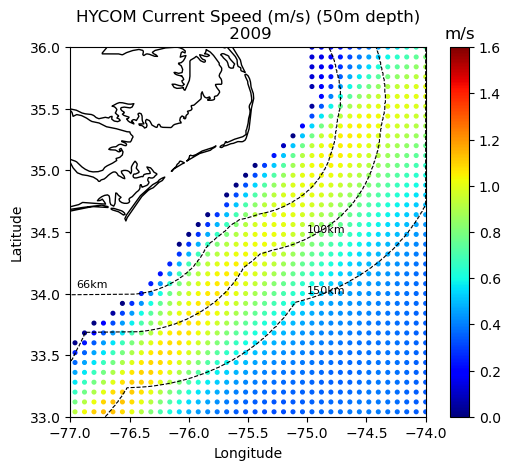

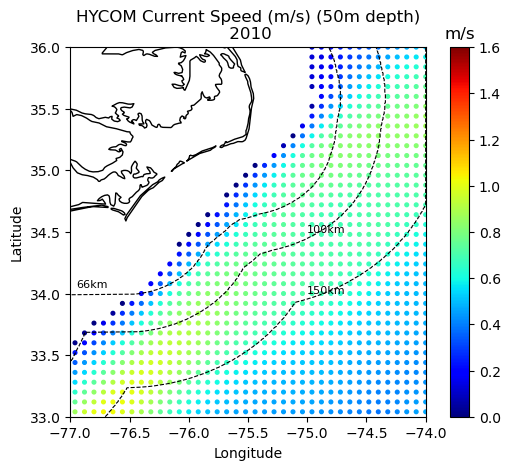

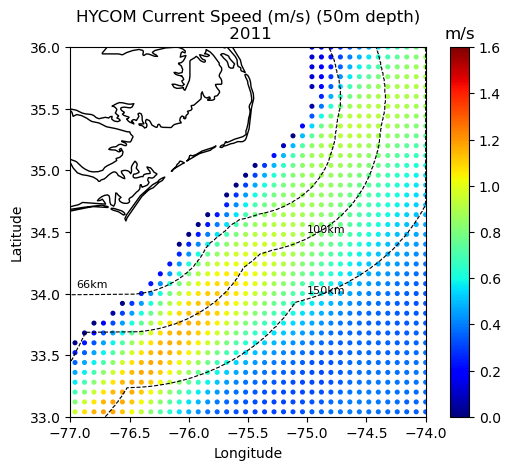

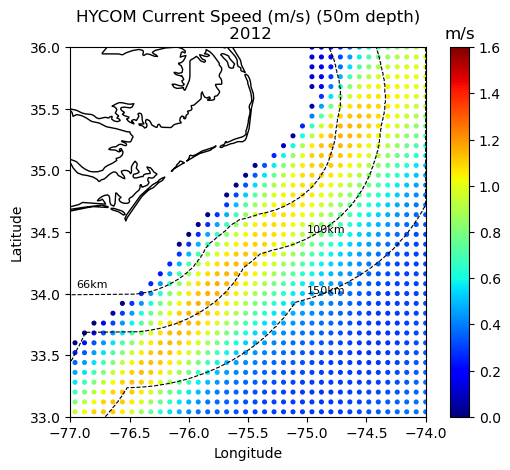

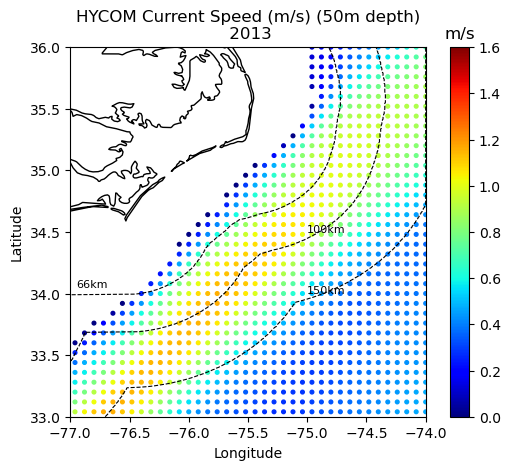

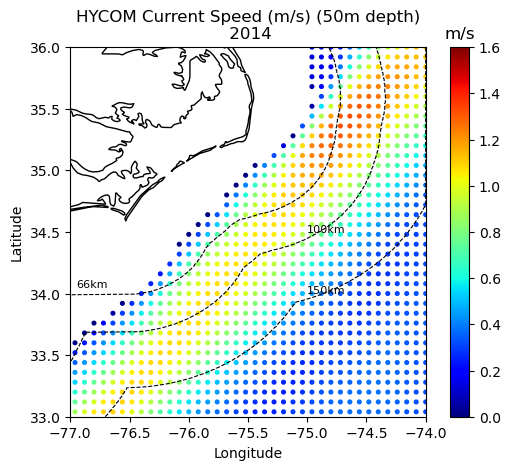

In [33]:

for Year in [2009,2010,2011,2012,2013,2014]:

    xlim =[min_longitude,max_longitude]
    ylim=[min_latitude, max_latitude]

    df = gpd.read_file(ShapeFileCoast)
    df1 = gpd.read_file(ShapeFileStates)

    fig, ax = plt.subplots(figsize  = None)

    df.plot(color='black',linewidth=1,ax=ax)
    df1.plot(color='black',linewidth=1,ax=ax)


    plt.plot(LatLong66km[:,1],LatLong66km[:,0], linestyle='--', color='black', linewidth=0.8)
    plt.plot(LatLong100km[:,1],LatLong100km[:,0], linestyle='--', color='black', linewidth=0.8)
    plt.plot(LatLong150km[:,1],LatLong150km[:,0], linestyle='--', color='black', linewidth=0.8)

    Years=np.array([OceanDateTime_MABSAB[i].year for i in range(len(OceanDateTime_MABSAB))])
    y=np.average(DailyAverage_Hycom[:,Years==Year],axis=1)
    plt.scatter(LatLong_HYCOM[:,1],LatLong_HYCOM[:,0],c=y, s=7, cmap='jet', vmin=0, vmax=1.6)

    clb = plt.colorbar()
    clb.ax.set_title('m/s')

    plt.text(-76.95,34.05,"66km",fontsize=8)

    plt.text(-75,34.5,"100km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

    plt.text(-75,34,"150km", fontsize=8,  bbox={'facecolor':'none', 'edgecolor':'none', 'pad':1})

    plt.title("HYCOM Current Speed (m/s) (50m depth)\n "+str(Year))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.savefig('HYCOMCurrentSpeed_'+str(Year)+'.png', dpi=600, bbox_inches='tight')